# ALC - Capítulo 1
## Nociones básicas de álgebra lineal

## Clase 1

In [ ]:
import numpy as np

In [ ]:
v1 = np.array([10., 5., -7, 1])
print(v1)

In [ ]:
v2 = np.array([5, 0, 3/2, 2])
print(v2)

In [ ]:
v1 + v2

In [ ]:
v1 * 3

In [ ]:
2**3

In [ ]:
# ** es el simbolo de potencia
sum(v1**2)

In [ ]:
v1 + 1

### Matrices

In [ ]:
A = np.array([[2,2],[3,4]]) # Matriz de 2 x 2
print("A = \n", A)

B = np.array([[1,2,3,4],[7,1,2,-1]]) # Matriz de 4 x 2
print("B = \n", B)

C = np.array([[1], [7], [1/3]]) # Matriz columna de 1 x 3
print("C = \n", C)

In [ ]:
C = np.array([[1], [7], [1/3,2]]) # Matriz columna de 1 x 3
print("C = \n", C)

In [ ]:
A * 2

In [ ]:
A**20

### row_echelon
(programita para escalonar matrices)

In [81]:
import numpy as np

def row_echelon(M):
    """ Return Row Echelon Form of matrix A """
    A = np.copy(M)
    if (issubclass(A.dtype.type, np.integer)):
        A = A.astype(float)
    #A = M.astype(float)
    # if matrix A has no columns or rows,
    # it is already in REF, so we return itself
    r, c = A.shape
    if r == 0 or c == 0:
        return A

    # we search for non-zero element in the first column
    for i in range(len(A)):
        if A[i,0] != 0:
            break
    else:
        # if all elements in the first column is zero,
        # we perform REF on matrix from second column
        B = row_echelon(A[:,1:])
        # and then add the first zero-column back
        return np.hstack([A[:,:1], B])

    # if non-zero element happens not in the first row,
    # we switch rows
    if i > 0:
        ith_row = A[i].copy()
        A[i] = A[0]
        A[0] = ith_row

    # we divide first row by first element in it
    A[0] = A[0] / A[0,0]
    # we subtract all subsequent rows with first row (it has 1 now as first element)
    # multiplied by the corresponding element in the first column
    A[1:] -= A[0] * A[1:,0:1]

    # we perform REF on matrix from second row, from second column
    B = row_echelon(A[1:,1:])

    # we add first row and first (zero) column, and return
    return np.vstack([A[:1], np.hstack([A[1:,:1], B]) ])

In [ ]:
A = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(A)

In [ ]:
print(row_echelon(A))

In [ ]:
# OJO... puede hacer algunas operaciones de cambios de fila!
A = np.array([[1,2,3,4], [1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(A)

In [ ]:
print(row_echelon(A))

In [ ]:
A = np.array([[5,3,11],[15,9,33],[20,12,44]])
print(row_echelon(A))

In [ ]:
A = np.array([[5,3,11],[15,9,33],[20,12,55]])
print(row_echelon(A))

## Clase 2

### Complejidad de la elimación gaussiana (row_echelon) experimentalmente

In [82]:
import time

In [83]:
# Matrices con numeros aleatorios
A = np.random.rand(10,10)
print(A)

[[0.21347621 0.07001441 0.71750785 0.9717043  0.23041224 0.59312423
  0.90117649 0.48503178 0.78584356 0.62524422]
 [0.93059116 0.77842525 0.70974201 0.90089024 0.94305737 0.15208559
  0.94679427 0.09645405 0.28681296 0.3594083 ]
 [0.12916178 0.76614234 0.24344909 0.5522278  0.200271   0.75266499
  0.40738839 0.02762216 0.17060865 0.17496525]
 [0.5733182  0.58023904 0.60220455 0.72579851 0.98916695 0.31845045
  0.22366613 0.6531065  0.06474465 0.60453029]
 [0.98603529 0.91511629 0.46904366 0.297432   0.58846602 0.19591951
  0.48567799 0.11689522 0.31546605 0.59958925]
 [0.65858818 0.73774604 0.23423588 0.24752904 0.40438902 0.878361
  0.1177529  0.8344979  0.4465848  0.54988026]
 [0.91492247 0.53689054 0.79834153 0.43305355 0.43654004 0.02708004
  0.05655379 0.92374542 0.9594164  0.70864482]
 [0.26508706 0.15298227 0.34830592 0.9521363  0.52979277 0.66187981
  0.80809499 0.31647296 0.89946256 0.05852864]
 [0.84663115 0.83694509 0.71433731 0.9273224  0.31445457 0.19480989
  0.55145841 0

In [86]:
A = np.random.rand(100,100)
start = time.time()
B = row_echelon(A)
end = time.time()
t1 = end - start
print(t1)

0.009861946105957031


In [88]:
A = np.random.rand(200,200)
start = time.time()
B = row_echelon(A)
end = time.time()
t2 = end - start
print(t2)

0.028187990188598633


In [89]:
A = np.random.rand(300,300)
start = time.time()
B = row_echelon(A)
end = time.time()
t3 = end - start
print(t3)

0.0932919979095459


In [90]:
A = np.random.rand(400,400)
start = time.time()
B = row_echelon(A)
end = time.time()
t4 = end - start
print(t4)

0.2537851333618164


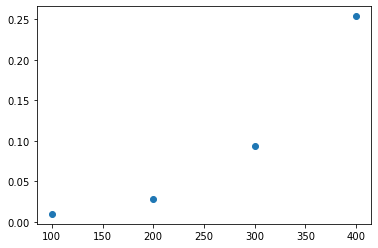

In [95]:
import matplotlib.pyplot as plt
x = np.array([100, 200, 300, 400])
t = np.array([t1, t2, t3, t4])
plt.scatter(x,t)

### Ejercicios (para hacer a lo largo de la materia)

1. Calcular mediante una iteración el tiempo en funcion de $n$ para distintos valores de $n$ y graficar.
2. Encontrar los  polinomios de grado 2 y de grado 3 que mejor aproximen los valores obtenidos. 




## Clase 3

In [96]:
v1 = np.array([1,2,4,5])
v2 = np.array([0,2,1,2])
v3 = np.array([4,4,14,16])
v4 = np.array([1,0,0,0])

In [98]:
A = np.array([v1,v2,v3,v4])

In [99]:
print(A)

[[ 1  2  4  5]
 [ 0  2  1  2]
 [ 4  4 14 16]
 [ 1  0  0  0]]


In [100]:
row_echelon(A)

array([[1. , 2. , 4. , 5. ],
       [0. , 1. , 0.5, 1. ],
       [0. , 0. , 1. , 1. ],
       [0. , 0. , 0. , 0. ]])

In [101]:
B = np.array([v1,v2,v3])

In [102]:
row_echelon(B)

array([[1. , 2. , 4. , 5. ],
       [0. , 1. , 0.5, 1. ],
       [0. , 0. , 0. , 0. ]])

In [103]:
C = np.array([v1,v2,v4])
row_echelon(C)

array([[1. , 2. , 4. , 5. ],
       [0. , 1. , 0.5, 1. ],
       [0. , 0. , 1. , 1. ]])

In [108]:
# El vector v
v = np.array([-1, 5, -5])

# La base B
B = [np.array([1,0,3]), np.array([2,-1,4]), np.array([3,2,1])]

# Matriz con los vectores de B como columnas
M = np.c_[B[0],B[1],B[2]]
print(M)

[[ 1  2  3]
 [ 0 -1  2]
 [ 3  4  1]]


In [109]:
# Buscamos las coordenadas de v en la base B
np.linalg.solve(M,v)

array([ 2., -3.,  1.])

In [110]:
# Verificamos
2 * B[0] - 3 * B[1] + 1 * B[2]

array([-1,  5, -5])

In [112]:
S = [np.array([1,-2,0]), np.array([2,0,5]), np.array([5,-2,10]), np.array([1,2,0]), np.array([3,2,1])]
S

[array([ 1, -2,  0]),
 array([2, 0, 5]),
 array([ 5, -2, 10]),
 array([1, 2, 0]),
 array([3, 2, 1])]

In [114]:
S = [np.array([2,-4,1,0]), np.array([-1,2,0,0]), np.array([0,0,0,1])]

In [116]:
M = np.array([S[0], S[1], S[2], np.array([???])])
row_echelon(M)

SyntaxError: invalid syntax (Temp/ipykernel_14780/1174715091.py, line 1)